In [2]:
import os
from micasense import imageset as imageset
from micasense import capture as capture
from micasense import image as image
from micasense import metadata as metadata
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

import rasterio
import glob
import xarray as xr

from rasterio.merge import merge
from rasterio.plot import show

In [3]:
imagePath = os.path.join('F:/', 'Micasense_WQ', '01_24_22', '0000SET', '000')
print(imagePath)

F:/Micasense_WQ\01_24_22\0000SET\000


In [4]:
log = pd.read_csv(os.path.join(imagePath, 'flight_stacks', 'log.csv'), index_col=False)
log.head()
         

,SourceFile,ID,GPSDateStamp,GPSTimeStamp,GPSLatitude,GPSLongitude,GPSAltitude,FocalLength,Yaw,Yaw (degrees),Pitch,Pitch (degrees),Roll,Roll (degrees),SolarElevation,ImageSize,Resolution,SensorSize
0,F:/Micasense_WQ\01_24_22\0000SET\000\flight_st...,Ylo31sWGkbuVYDF10lok.tif,2022:01:24,17:59:49,38.592835,-76.129233,52.361,5.43432,3.083048,176.645615,0.360749,20.669414,-0.389493,-22.316296,0.549203,"(1280, 960)","(266.666667, 266.666667)","(4.799999993999999, 3.5999999954999997)"
1,F:/Micasense_WQ\01_24_22\0000SET\000\flight_st...,NMoAhE4PywOT2FIXypbY.tif,2022:01:24,17:59:50,38.592879,-76.129093,51.786,5.43432,3.108874,178.125353,0.371612,21.291782,-0.401219,-22.988144,0.549190,"(1280, 960)","(266.666667, 266.666667)","(4.799999993999999, 3.5999999954999997)"
2,F:/Micasense_WQ\01_24_22\0000SET\000\flight_st...,sbi4gZ1UbCVQCvLm1CUc.tif,2022:01:24,17:59:52,38.592919,-76.128966,51.418,5.43432,3.136328,179.698332,0.396074,22.693356,-0.445524,-25.526673,0.549177,"(1280, 960)","(266.666667, 266.666667)","(4.799999993999999, 3.5999999954999997)"
3,F:/Micasense_WQ\01_24_22\0000SET\000\flight_st...,XT3Y7YBvKDwXjma03AiL.tif,2022:01:24,17:59:53,38.592953,-76.128859,51.079,5.43432,-3.096791,-177.433046,0.402766,23.076772,-0.400855,-22.967287,0.549164,"(1280, 960)","(266.666667, 266.666667)","(4.799999993999999, 3.5999999954999997)"
4,F:/Micasense_WQ\01_24_22\0000SET\000\flight_st...,tKvtNzEdaHBMwGEj03Zk.tif,2022:01:24,17:59:54,38.592987,-76.128752,50.739,5.43432,-3.069309,-175.858437,0.396036,22.691204,-0.419794,-24.052432,0.549152,"(1280, 960)","(266.666667, 266.666667)","(4.799999993999999, 3.5999999954999997)"


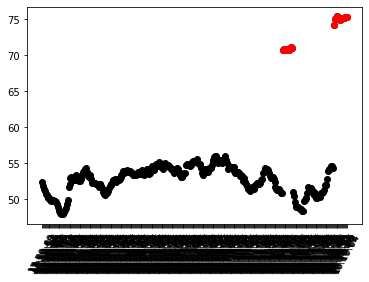

In [7]:
plt.scatter(log['GPSTimeStamp'].values, log['GPSAltitude'].values, color='black')
plt.xticks(rotation=60)

plt.scatter(log['GPSTimeStamp'][265:278].values, log['GPSAltitude'][265:278].values, color='red')
plt.scatter(log['GPSTimeStamp'][323:342].values, log['GPSAltitude'][323:342].values, color='red')

plt.show()

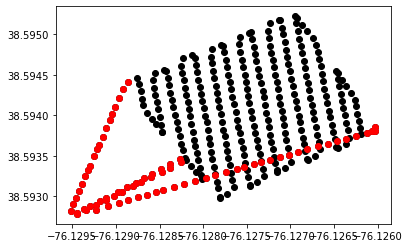

In [8]:
plt.scatter(log['GPSLongitude'].values, log['GPSLatitude'].values, color='black')

plt.scatter(log['GPSLongitude'][0:32].values, log['GPSLatitude'][0:32].values, color='red')
plt.scatter(log['GPSLongitude'][265:278].values, log['GPSLatitude'][265:278].values, color='red')
plt.scatter(log['GPSLongitude'][278:290].values, log['GPSLatitude'][278:290].values, color='red')
plt.scatter(log['GPSLongitude'][322:342].values, log['GPSLatitude'][322:342].values, color='red')

plt.ticklabel_format(useOffset=False)  
plt.show()

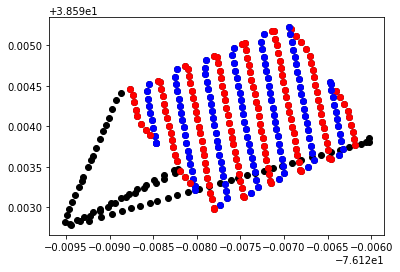

In [84]:
plt.scatter(log['GPSLongitude'].values, log['GPSLatitude'].values, color='black')

plt.scatter(log['GPSLongitude'][32:41].values, log['GPSLatitude'][32:41].values, color='red')

plt.scatter(log['GPSLongitude'][41:53].values, log['GPSLatitude'][41:53].values, color='blue')

plt.scatter(log['GPSLongitude'][53:73].values, log['GPSLatitude'][53:73].values, color='red')

plt.scatter(log['GPSLongitude'][73:93].values, log['GPSLatitude'][73:93].values, color='blue')

plt.scatter(log['GPSLongitude'][93:115].values, log['GPSLatitude'][93:115].values, color='red')

plt.scatter(log['GPSLongitude'][115:136].values, log['GPSLatitude'][115:136].values, color='blue')

plt.scatter(log['GPSLongitude'][136:158].values, log['GPSLatitude'][136:158].values, color='red')

plt.scatter(log['GPSLongitude'][158:179].values, log['GPSLatitude'][158:179].values, color='blue')

plt.scatter(log['GPSLongitude'][179:201].values, log['GPSLatitude'][179:201].values, color='red')

plt.scatter(log['GPSLongitude'][201:222].values, log['GPSLatitude'][201:222].values, color='blue')

plt.scatter(log['GPSLongitude'][222:244].values, log['GPSLatitude'][222:244].values, color='red')

plt.scatter(log['GPSLongitude'][244:262].values, log['GPSLatitude'][244:262].values, color='blue')

plt.scatter(log['GPSLongitude'][262:265].values, log['GPSLatitude'][262:265].values, color='red')
plt.scatter(log['GPSLongitude'][291:304].values, log['GPSLatitude'][291:304].values, color='red')

plt.scatter(log['GPSLongitude'][304:314].values, log['GPSLatitude'][304:314].values, color='blue')

plt.scatter(log['GPSLongitude'][314:322].values, log['GPSLatitude'][314:322].values, color='red')

#red
yaw_front = pd.concat([log[32:41], log[53:73], log[93:115], log[136:158], log[179:201], log[222:244], log[262:265], log[291:304], log[314:322]])

#blue
yaw_back = pd.concat([log[41:52], log[73:93], log[115:136], log[158:179], log[201:222], log[244:262], log[304:314]])


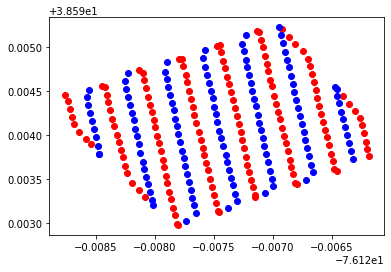

In [86]:

plt.scatter(yaw_front['GPSLongitude'].values, yaw_front['GPSLatitude'].values, color='red')
plt.scatter(yaw_back['GPSLongitude'].values, yaw_back['GPSLatitude'].values, color='blue')


In [5]:
# space location / scaling factor - half the image

def spacetotopdown(top_im, cam, image_size, scaling):
    x1 = top_im.shape[0]/2 + cam.spaceFromImage([0,0])[0] / scaling
    y1 = top_im.shape[1]/2 - cam.spaceFromImage([0,0])[1] / scaling
    
    x2 = top_im.shape[0]/2 + cam.spaceFromImage([image_size[0]-1,0])[0] / scaling
    y2 = top_im.shape[1]/2 - cam.spaceFromImage([image_size[0]-1,0])[1] / scaling
    
    x3 = top_im.shape[0]/2 + cam.spaceFromImage([image_size[0]-1,image_size[1]-1])[0] / scaling
    y3 = top_im.shape[1]/2 - cam.spaceFromImage([image_size[0]-1,image_size[1]-1])[1] / scaling
    
    x4 = top_im.shape[0]/2 + cam.spaceFromImage([0,image_size[1]-1])[0] / scaling
    y4 = top_im.shape[1]/2 - cam.spaceFromImage([0,image_size[1]-1])[1] / scaling
    return(np.array([[x1,y1], [x2,y2], [x3,y3], [x4,y4]]))
    #return([x1,x2,x3,x4],[y1, y2, y3,y4])

In [ ]:
#red
yaw_front = 32:41, 53:73, 93:115, 136:158, 179:201, 222:244, 262:265, 291:304, 314:322

#blue
yaw_back = 41:52, 73:93, 115:136, 158:179, 201:222, 244:262, 304:314


In [19]:
import cameratransform as ct

#for n in range(33,264):
#for n in range(291,321):

for n in range(93,94):
    log = pd.read_csv(os.path.join(imagePath, 'flight_stacks', 'log.csv'), index_col=False)
    path_name = os.path.join(imagePath, 'flight_stacks', log['ID'][n])
    #print(path_name)
    focal = log['FocalLength'][n]
    #sensor_size = log['SensorSize'][n]
    #image_size = log['ImageSize'][n]
    image_size = (1219,923)
    sensor_size = (4.799999993999999, 3.5999999954999997)
    
    #print(focal, image_size, sensor_size)
    lat = log['GPSLatitude'][n] 
    lon = log['GPSLongitude'][n]
    alt = log['GPSAltitude'][n]
    pitch = log['Pitch'][n]* 180/math.pi
    roll = log['Roll'][n]* 180/math.pi
    yaw = log['Yaw'][n]* 180/math.pi
    #print(yaw, pitch, roll, alt, lat, lon)                 
                     

    cam = ct.Camera(ct.RectilinearProjection(focallength_mm=focal,
                                        sensor=sensor_size,
                                         image=image_size),
                   ct.SpatialOrientation(elevation_m=alt,
                                     tilt_deg=0,
                                     roll_deg=0,
                                    heading_deg=180,
                                    pos_x_m=0, pos_y_m=0))
    # gps pts are lat lon
    cam.setGPSpos(lat, lon, alt)
 
    scaling = .04
    #for loop - top_im for each band and stack
    top_imgs = []
    for i in range(1,6):
        with rasterio.open(path_name) as source:
            im = source.read(i)
            #print(im.shape)
            #im = ndimage.gaussian_filter(im, sigma=45, order=0)

        top_im = cam.getTopViewOfImage(im, [-100, 100,-100, 100], scaling=scaling, do_plot=False)
        top_imgs.append(top_im) #it was .T
    #print(top_im.shape)

    stacked_projected_img = np.stack(top_imgs)

    # Now get the image coordinates of the corners of the original image but in the top down image
    image_coords = spacetotopdown(top_im, cam, image_size, scaling)
    #print(image_coords)

    # these are the coordinates of the image corners
    coords = np.array([cam.gpsFromImage([0 , 0]), \
        cam.gpsFromImage([image_size[0]-1 , 0]), \
        cam.gpsFromImage([image_size[0]-1, image_size[1]-1]), \
        cam.gpsFromImage([0 , image_size[1]-1])])
    #print(coords)
 
    gcp1 = rasterio.control.GroundControlPoint(row=image_coords[0,0], col=image_coords[0,1], x=coords[0,1], y=coords[0,0], z=coords[0,2], id=None, info=None)
    gcp2 = rasterio.control.GroundControlPoint(row=image_coords[1,0], col=image_coords[1,1], x=coords[1,1], y=coords[1,0], z=coords[1,2], id=None, info=None)
    gcp3 = rasterio.control.GroundControlPoint(row=image_coords[2,0], col=image_coords[2,1], x=coords[2,1], y=coords[2,0], z=coords[2,2], id=None, info=None)
    gcp4 = rasterio.control.GroundControlPoint(row=image_coords[3,0], col=image_coords[3,1], x=coords[3,1], y=coords[3,0], z=coords[3,2], id=None, info=None)
    
    # open the original image
    with rasterio.open(os.path.join(imagePath, 'flight_stacks', log['ID'][n]), 'r') as src:
        profile = src.profile
        #print(profile)
                 
        # create rasterio transform
        tsfm = rasterio.transform.from_gcps([gcp1,gcp2,gcp3,gcp4])
    
        crs = rasterio.crs.CRS({"init": "epsg:4326"})

        profile.update(dtype=rasterio.float32, 
                       transform = tsfm, 
                       crs=crs,
                      width=top_im.shape[0],
                      height=top_im.shape[1])
        
        #print(profile)
        with rasterio.open(os.path.join(imagePath, 'georeferenced_stacks_4', str(n) + '.tif'), 'w', **profile) as dst:
            #dst.write(src.read().astype(rasterio.float32))   
            dst.write(stacked_projected_img.astype(rasterio.float32))


In [20]:
dirpath = os.path.join(imagePath, 'georeferenced_stacks_4')
search_criteria = "*.tif"
q = os.path.join(dirpath, search_criteria)
tif_files = glob.glob(q)

src_files_to_mosaic = []

for i in tif_files:
    src = rasterio.open(i)
    src_files_to_mosaic.append(src)

print(src_files_to_mosaic[0].shape)
print(len(src_files_to_mosaic))

(5000, 5000)
247


In [21]:
#merge
mosaic, out_trans = merge(src_files_to_mosaic)
print(mosaic.shape)
print(type(mosaic))

(5, 8770, 13554)
<class 'numpy.ndarray'>


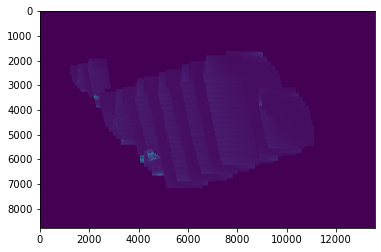

In [22]:
plt.imshow(mosaic[0,:,:])

<class 'numpy.ndarray'>


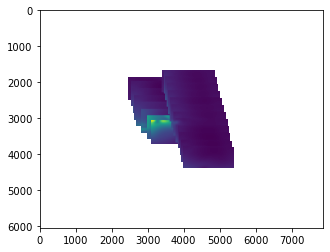

<AxesSubplot:>

In [57]:
mosaic_blue = mosaic[0,:,:].astype('float')
mosaic_blue[mosaic_blue == 0] = 'nan'
print(type(mosaic_blue))
show(mosaic_blue)

In [31]:
#update metadata
out_meta = src_files_to_mosaic[0].meta.copy()
print(out_meta)


# Update the metadata
out_meta.update({"driver": "GTiff",
                 "height": mosaic.shape[1],
                 "width": mosaic.shape[2],
                 "transform": out_trans,
                 "crs": src.crs
                 }
                )


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 5000, 'height': 5000, 'count': 5, 'crs': CRS.from_epsg(4326), 'transform': Affine(-1.1236804382482256e-15, 4.602582136411815e-07, -76.1283824455313,
       -3.597256087711596e-07, -8.757243993531882e-16, 38.59603211370747)}


In [32]:
# Write the mosaic raster to disk
out_fp = os.path.join(dirpath, 'final_mosaic.tif')

with rasterio.open(out_fp, "w", **out_meta) as dest:
    dest.write(mosaic)

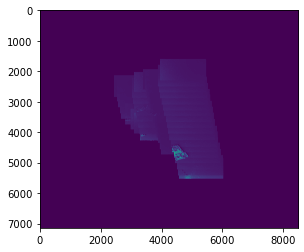

In [13]:
plt.imshow(mosaic[0,:,:])